In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import re
from urllib.parse import urlparse

df = pd.read_csv("poem_dataset.csv")
df

,Unnamed: 0,title,content,source,url
0,0,“Cái làm ta hạnh phúc”,Cái làm ta hạnh phúc\nThực ra cũng chẳng nhiều...,"Nguồn: Châm ngôn mới (thơ), Thái Bá Tân, NXB L...",https://www.thivien.net/Th%C3%A1i-B%C3%A1-T%C3...
1,1,“Chiều vừa xốp trên tay”,Chiều vừa xốp trên tay\nChợt nghe thoáng ong b...,"Nguồn: Lâm Huy Nhuận, Chiều có thật (thơ), NXB...",https://www.thivien.net/L%C3%A2m-Huy-Nhu%E1%BA...
2,2,“Dưới giàn hoa thiên lý...”,Dưới giàn hoa thiên lý\nMột mình anh đang ngồi...,"Nguồn: Nguyễn Nhật Ánh, Mắt biếc, NXB Trẻ, 2004",https://www.thivien.net/Nguy%E1%BB%85n-Nh%E1%B...
3,3,"“Đến, nhiều nơi để đến”","Đến, nhiều nơi để đến\nVề, trở lại với mình\nC...","Nguồn: Châm ngôn mới (thơ), Thái Bá Tân, NXB L...",https://www.thivien.net/Th%C3%A1i-B%C3%A1-T%C3...
4,4,“Đừng bao giờ dại dột”,Đừng bao giờ dại dột\nĐem chuyện riêng của mìn...,"Nguồn: Châm ngôn mới (thơ), Thái Bá Tân, NXB L...",https://www.thivien.net/Th%C3%A1i-B%C3%A1-T%C3...
...,...,...,...,...,...
85,85,Anh Đáp tự thiêu,Đời anh hăm hai tuổi\nChỉ còn cục than đen.\nC...,"7-1958\n\nNguồn: Huy Cận, Trời mỗi ngày lại sá...",https://www.thivien.net/Huy-C%E1%BA%ADn/Anh-%C...
86,86,Anh đi công tác về,Anh đi công tác về\nEm chạy ào ra đón\nCả nhà ...,NaN,https://www.thivien.net/L%C3%BD-Ph%C6%B0%C6%A1...
87,87,Anh đi qua đời em,Anh đi qua đời em\nNhư cơn mưa mùa hè\nTắm mưa...,NaN,https://www.thivien.net/Phi-Tuy%E1%BA%BFt-Ba/A...
88,88,Anh điên,Anh nằm ngoài sự thực\nEm ngồi trong chiêm bao...,NaN,https://www.thivien.net/H%C3%A0n-M%E1%BA%B7c-T...


### 1. Count of Entries per Source

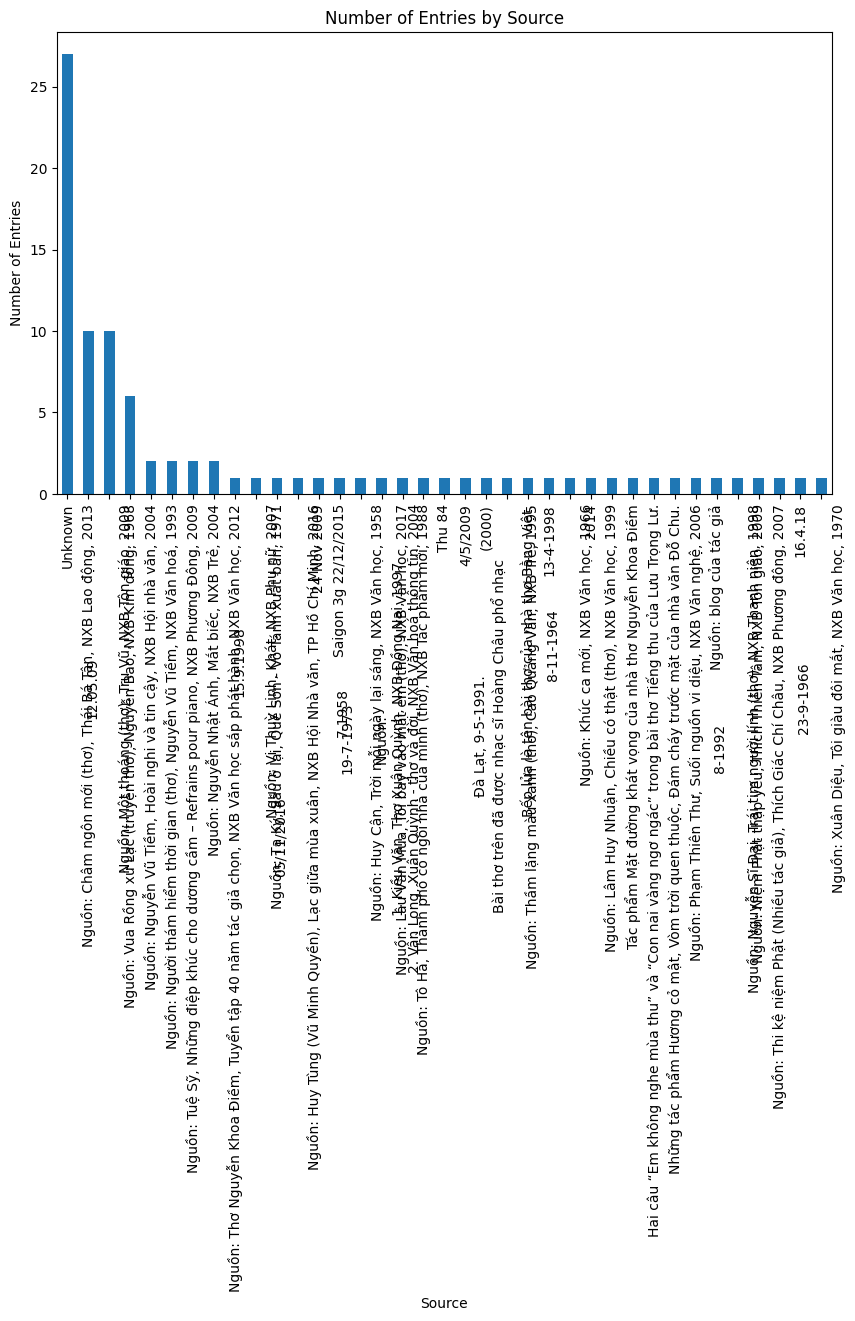

In [2]:
df['source_cleaned'] = df['source'].fillna('Unknown')
source_counts = df['source_cleaned'].value_counts()

# Plot the source distribution
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Number of Entries by Source')
plt.xlabel('Source')
plt.ylabel('Number of Entries')
plt.show()


### 2. Keyword Frequency in Titles

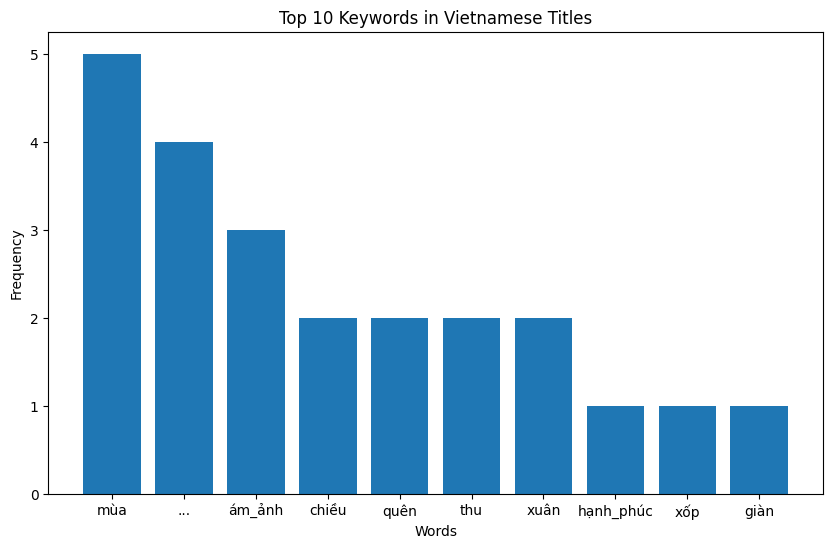

In [7]:
from underthesea import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    return set(stopwords)

# Load stopwords
stopwords_path = "/content/vietnamese-stopwords.txt"
vietnamese_stopwords = load_stopwords(stopwords_path)

# Tokenize titles using underthesea
titles = df['title'].dropna().str.lower()
tokenized_titles = titles.apply(lambda x: word_tokenize(x, format="text"))  # Tokenize and join as a single string

# Extract keywords (excluding stopwords)
all_words = ' '.join(tokenized_titles).split()
filtered_words = [word for word in all_words if word not in vietnamese_stopwords and len(word) > 2]

# Count keyword frequencies
word_counts = Counter(filtered_words)

# Plot the top 10 keywords
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Keywords in Vietnamese Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


### 3. Content Length Distribution

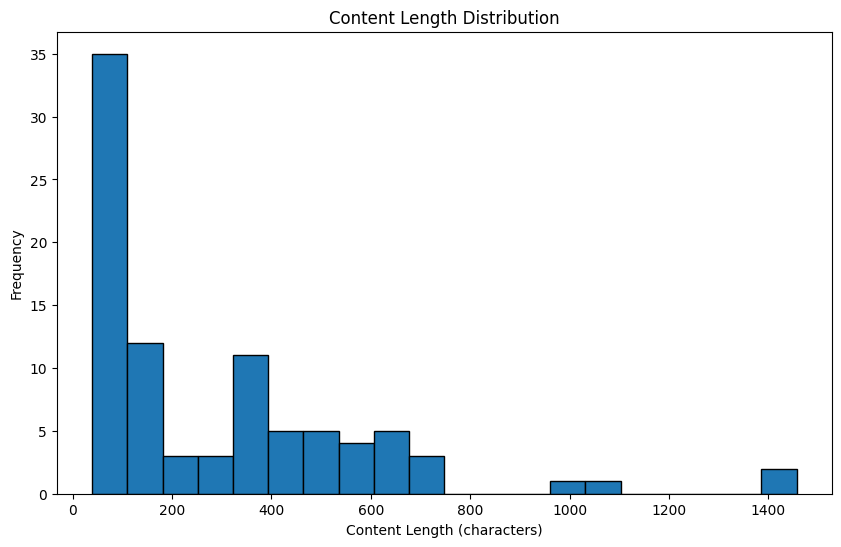

In [8]:
df['content_length'] = df['content'].str.len()
plt.figure(figsize=(10, 6))
df['content_length'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Content Length Distribution')
plt.xlabel('Content Length (characters)')
plt.ylabel('Frequency')
plt.show()

### 4. URL Domains

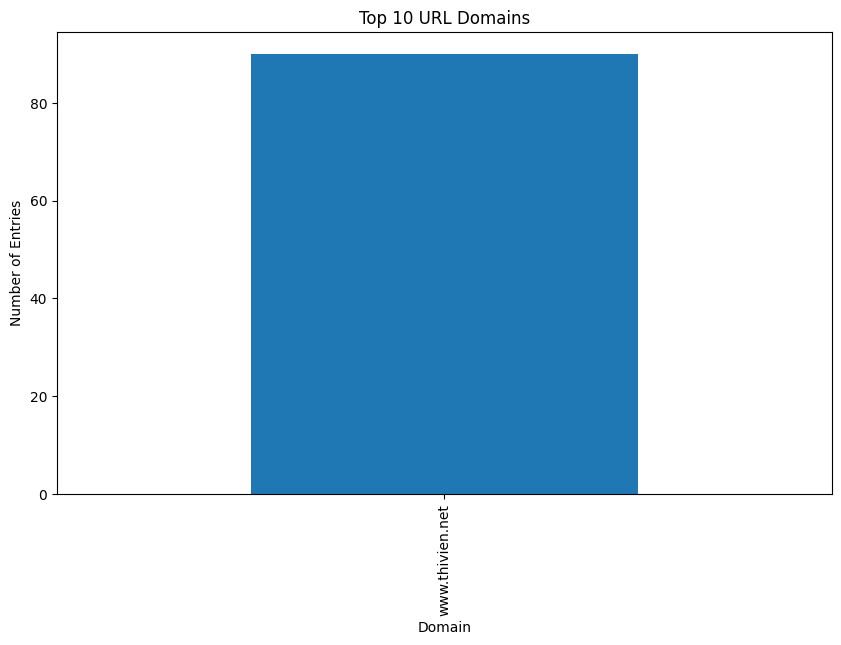

In [9]:
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc if pd.notna(x) else 'Unknown')
domain_counts = df['domain'].value_counts()

# Plot the top domains
plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar')
plt.title('Top 10 URL Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Entries')
plt.show()

In [ ]:
# 5. Sentiment Analysis

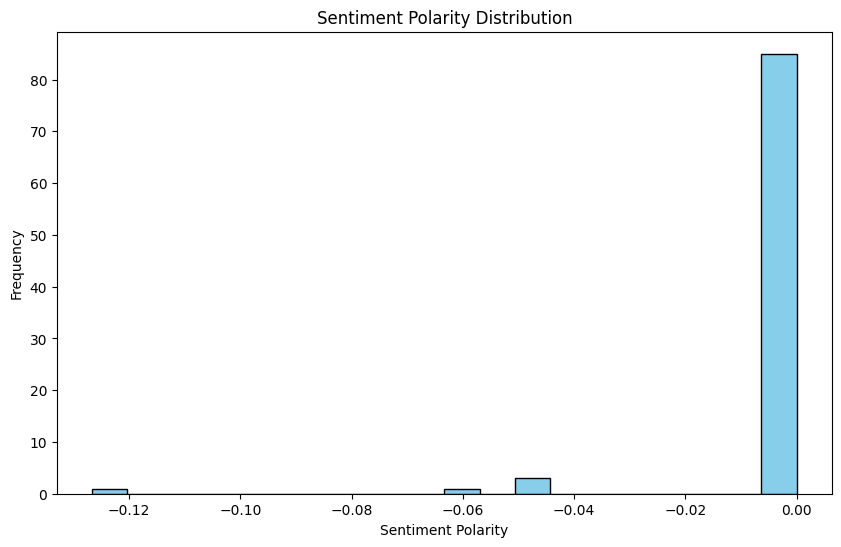

In [10]:
from textblob import TextBlob

df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else 0)
plt.figure(figsize=(10, 6))
df['sentiment'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

### 6. Most Common Authors

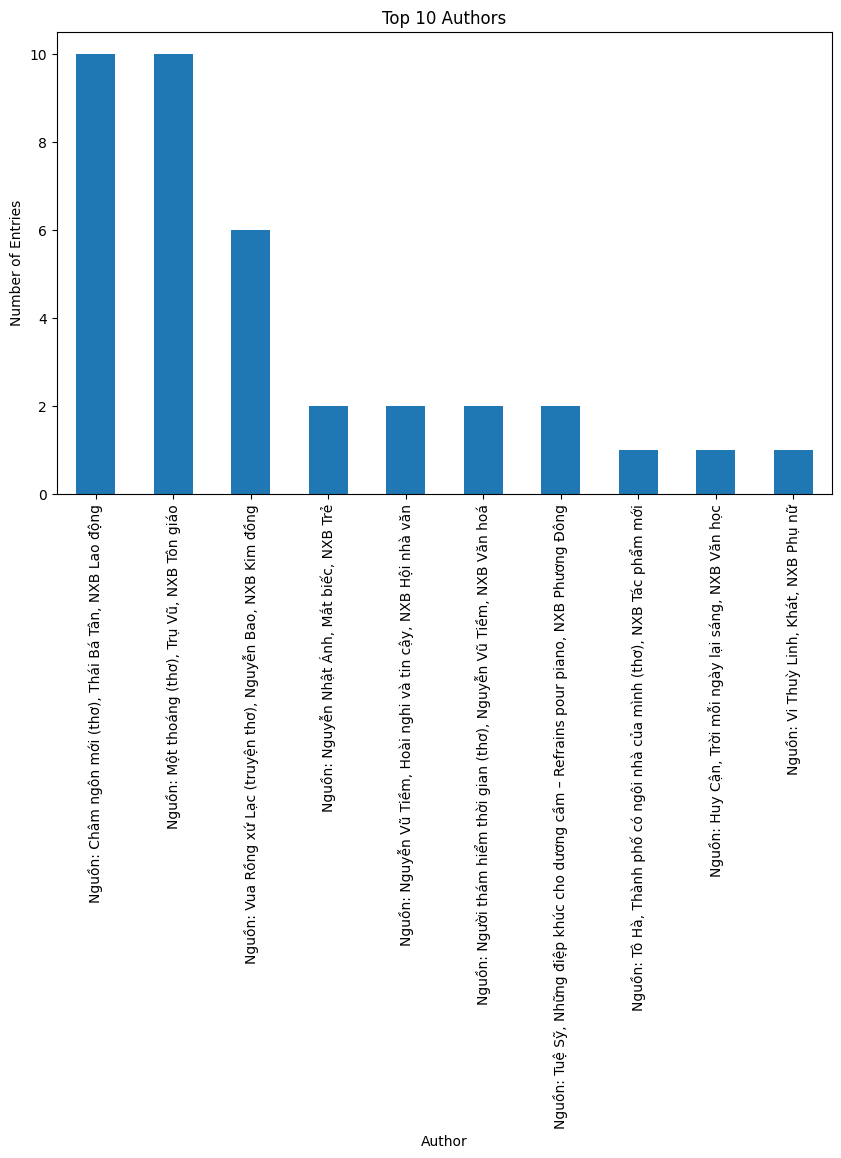

In [11]:
df['author'] = df['source'].str.extract(r'(.*),')
author_counts = df['author'].value_counts()

# Plot the top 10 authors
plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar')
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Entries')
plt.show()
